In [291]:
from cl_model import Cl_distribution
import networkx as nx
import matplotlib.pyplot as plt
import queue
import random

In [292]:
n = 1000
m = 20000

<function matplotlib.pyplot.show(*args, **kw)>

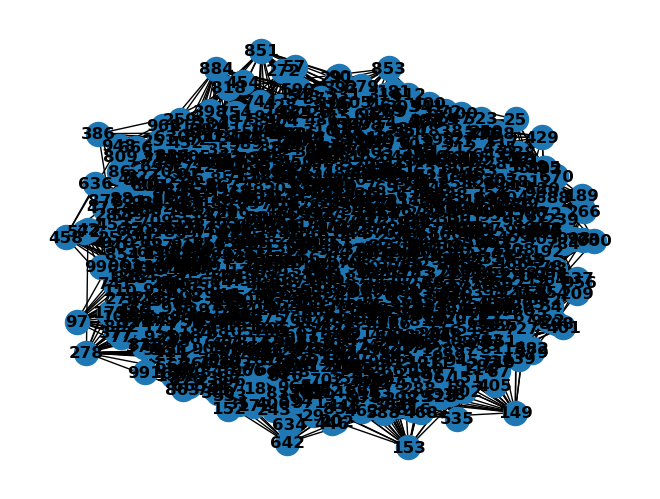

In [293]:
rg = nx.gnm_random_graph(n, m)
nx.draw(rg, with_labels=True, font_weight='bold')
plt.show

In [294]:
rg.degree
rg.degree(1)

45

In [295]:
# print degree sequence
degree_sequence = list(d for n, d in rg.degree())
print(degree_sequence)
rg.number_of_edges()

[40, 45, 42, 39, 42, 35, 35, 40, 39, 41, 44, 38, 51, 38, 28, 55, 42, 49, 37, 35, 30, 39, 47, 55, 39, 33, 31, 45, 36, 33, 38, 38, 34, 32, 45, 35, 34, 30, 46, 48, 35, 52, 32, 42, 34, 31, 44, 41, 39, 42, 42, 49, 36, 36, 44, 34, 52, 26, 44, 41, 31, 48, 40, 39, 31, 38, 44, 35, 44, 41, 54, 35, 40, 45, 44, 36, 39, 34, 34, 36, 41, 38, 40, 39, 42, 38, 30, 30, 36, 41, 38, 33, 42, 42, 42, 49, 37, 25, 30, 37, 39, 44, 53, 34, 32, 45, 37, 49, 49, 48, 35, 44, 46, 50, 35, 37, 47, 36, 38, 37, 33, 45, 30, 48, 36, 34, 37, 46, 39, 32, 45, 39, 50, 39, 42, 40, 39, 46, 38, 45, 37, 40, 44, 40, 42, 42, 40, 35, 37, 26, 37, 35, 35, 27, 49, 47, 38, 37, 35, 45, 38, 36, 39, 43, 54, 37, 54, 41, 39, 41, 46, 36, 36, 41, 39, 33, 36, 39, 37, 28, 46, 30, 40, 48, 38, 42, 39, 42, 44, 27, 47, 40, 34, 34, 37, 45, 56, 38, 39, 39, 33, 54, 43, 39, 40, 42, 46, 37, 38, 30, 45, 36, 40, 42, 41, 47, 36, 35, 45, 36, 27, 45, 26, 50, 43, 44, 43, 39, 44, 45, 39, 46, 39, 52, 43, 34, 41, 52, 40, 32, 45, 34, 45, 39, 36, 39, 59, 34, 49, 39,

20000

In [297]:
cl_helper = Cl_distribution(degree_sequence)
iter = 0
G = nx.Graph()
for i in range (0,n):
    G.add_node(i)
while G.number_of_edges() < m and iter<10000:
    id1 = cl_helper.rvs()
    if G.degree(id1)<degree_sequence[id1]:
        id2 = cl_helper.rvs()
        #while id2==id1 or G.degree(id2)>=degree_sequence[id2]:
            #id2 = cl_helper.rvs()
        if id2==id1 or G.degree(id2)>=degree_sequence[id2]:
            continue
        else:
            G.add_edge(id1,id2)
    iter+=1

999

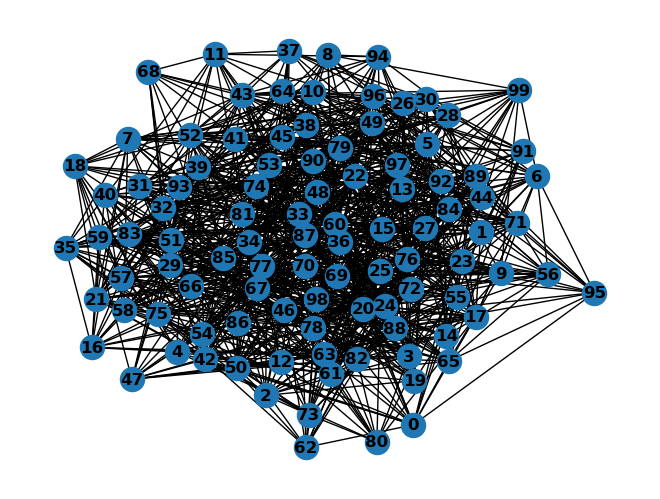

In [ ]:
nx.draw(G, with_labels=True, font_weight='bold')
plt.show
G.number_of_edges()

In [ ]:
# pseudo-clustering coefficient
## choose a node at random, choose two of its neighbors at random, and check if they are connected.

def average_clustering(G, trials=1000):
    triangles = 0
    nodes = G.nodes()
    for i in [int(random.random() * n) for i in range(trials)]:
        # neighbors of i
        nbrs = list(G.adj[i])
        if len(nbrs) < 2:
            continue
        u, v = random.sample(nbrs, 2)
        if u in G[v]:
            triangles +=1
    return triangles / float(trials)

In [ ]:
average_clustering(rg)

0.22

In [ ]:
average_clustering(G)

0.192